In [2]:

GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/skin-cancer-malignant-vs-benign/"
training_data_dir = path + "train" # 10 000 * 2
test_data_dir = path + "test" # 12 500


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [32]:
import os
train_cancer = os.listdir(training_data_dir)
print(train_horse_names[:2])

test_cancer = os.listdir(test_data_dir)
print(train_human_names[:2])

['benign', 'malignant']
['malignant', 'benign']


In [33]:
print('total training cancer images:', len(os.listdir(training_data_dir)))

total training cancer images: 2


In [0]:
import tensorflow as tf

In [0]:

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test = ImageDataGenerator(rescale = 1./255)

In [39]:
training_set = train.flow_from_directory(training_data_dir,
                                                 target_size = (300,300),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test.flow_from_directory(test_data_dir,
                                            target_size = (300, 300),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model.fit_generator(training_set,
                         steps_per_epoch = 1027,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 655)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Epoch 1/5
1027/1027 [==============================] - 728s 708ms/step - loss: 0.4443 - acc: 0.7824 - val_loss: 0.3742 - val_acc: 0.8427
Epoch 2/5
1027/1027 [==============================] - 705s 686ms/step - loss: 0.3361 - acc: 0.8512 - val_loss: 0.3375 - val_acc: 0.8636
Epoch 3/5
1027/1027 [==============================] - 703s 684ms/step - loss: 0.2871 - acc: 0.8747 - val_loss: 0.3263 - val_acc: 0.8713
Epoch 4/5
1027/1027 [==============================] - 704s 685ms/step - loss: 0.2544 - acc: 0.8953 - val_loss: 0.4537 - val_acc: 0.8605
Epoch 5/5
1027/1027 [==============================] - 704s 686ms/step - loss: 0.2311 - acc: 0.9057 - val_loss: 0.4091 - val_acc: 0.8577


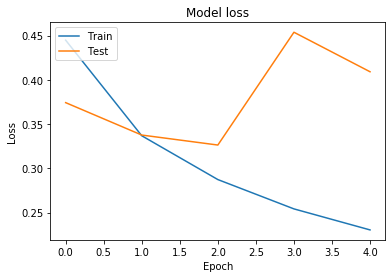

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

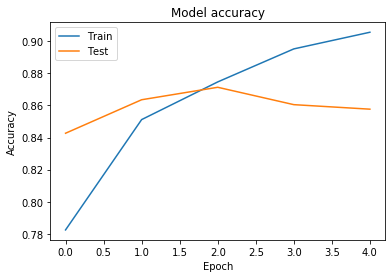

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
